<a href="https://colab.research.google.com/github/kartikdangi/ML-signal/blob/main/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

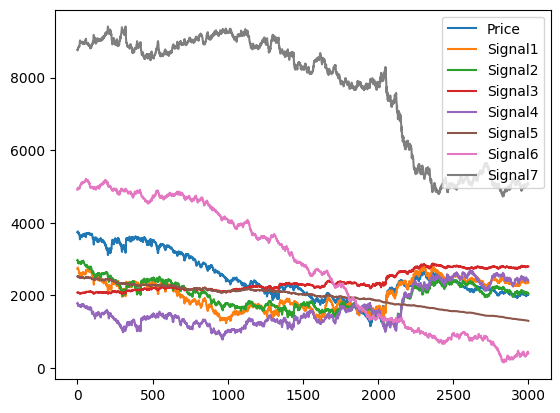

In [23]:
# Importing libraries and plotting time series

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('finclub_dataset.csv')
dfv = df.iloc[:, 2:]

dfv.plot()


In [24]:
df

,Unnamed: 0,Date,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,0,30-11-2016,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,1,29-11-2016,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,2,28-11-2016,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,3,25-11-2016,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,4,23-11-2016,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...,...,...
2995,2995,07-01-2005,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2996,2996,06-01-2005,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2997,2997,05-01-2005,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2998,2998,04-01-2005,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


In [25]:
df.describe()

,Unnamed: 0,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
count,3000.000000,3000.000000,3000.000000,2998.000000,2998.000000,2998.000000,3000.000000,2998.000000,2998.000000
mean,1499.500000,2495.633977,2048.124629,2001.826284,2377.852182,1636.205521,1963.481103,2815.552929,7671.653672
std,866.169729,626.039680,401.765939,377.170717,265.373317,513.544763,321.111659,1684.399434,1600.081355
min,0.000000,1150.101000,1238.331000,1014.435900,2035.200900,783.312400,1298.750700,150.960000,4724.419000
25%,749.750000,2060.030250,1686.693250,1690.910100,2170.494125,1254.797625,1713.741950,1021.360000,5603.856625
50%,1499.500000,2321.707000,2124.694000,2053.757250,2279.034450,1443.952800,2030.514000,2843.760000,8453.432750
75%,2249.250000,3044.440750,2383.497750,2305.277775,2733.506075,2176.668950,2187.917850,4638.960000,8952.722325
max,2999.000000,3762.695000,2807.346000,2982.138300,2874.594600,2694.355500,2530.660800,5210.160000,9409.212700


In [26]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
Signal1       0
Signal2       2
Signal3       2
Signal4       2
Signal5       0
Signal6       2
Signal7       2
dtype: int64

In [27]:
# Handling null values via replacement with average values =>
l = list(dfv.columns)
print(l)
for col in dfv.columns:
  if col == l[0]: continue
  dfv[col].fillna(value=df[col].mean(), inplace=True)

['Price', 'Signal1', 'Signal2', 'Signal3', 'Signal4', 'Signal5', 'Signal6', 'Signal7']


In [28]:
dfv

,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
0,3737.977,2728.177,2971.1835,2079.2105,1779.8949,2519.4459,4910.96,8767.2587
1,3747.922,2751.722,2982.1383,2084.7049,1795.4482,2525.0559,4910.96,8748.9140
2,3742.924,2760.324,2969.1945,2087.6731,1792.6194,2530.6608,4938.16,8770.7012
3,3762.695,2766.495,2921.0607,2088.0335,1749.1181,2524.3249,4965.36,8786.6132
4,3748.024,2738.224,2922.8202,2082.5629,1743.9943,2517.9924,4938.16,8785.8550
...,...,...,...,...,...,...,...,...
2995,2016.540,2353.140,2069.7840,2791.5292,2444.1478,1303.1724,450.16,5072.4787
2996,2019.430,2342.430,2057.5440,2789.7969,2424.1167,1301.5438,422.96,5074.6887
2997,2012.290,2348.890,2050.2000,2789.8513,2423.0678,1302.0062,422.96,5089.3104
2998,2019.600,2342.600,2052.1890,2790.3273,2418.6818,1300.3776,422.96,5081.3578


In [29]:
# Finding correlation within the matrix

dfv.corr()

,Price,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
Price,1.000000,0.471210,0.731276,-0.430710,-0.243258,0.638312,0.730192,0.379838
Signal1,0.471210,1.000000,0.760085,0.527980,0.675409,-0.263836,-0.226041,-0.585107
Signal2,0.731276,0.760085,1.000000,0.049256,0.409209,0.166727,0.254009,-0.166606
Signal3,-0.430710,0.527980,0.049256,1.000000,0.883479,-0.935156,-0.906197,-0.979055
Signal4,-0.243258,0.675409,0.409209,0.883479,1.000000,-0.790837,-0.765063,-0.940588
Signal5,0.638312,-0.263836,0.166727,-0.935156,-0.790837,1.000000,0.954897,0.923112
Signal6,0.730192,-0.226041,0.254009,-0.906197,-0.765063,0.954897,1.000000,0.894522
Signal7,0.379838,-0.585107,-0.166606,-0.979055,-0.940588,0.923112,0.894522,1.000000


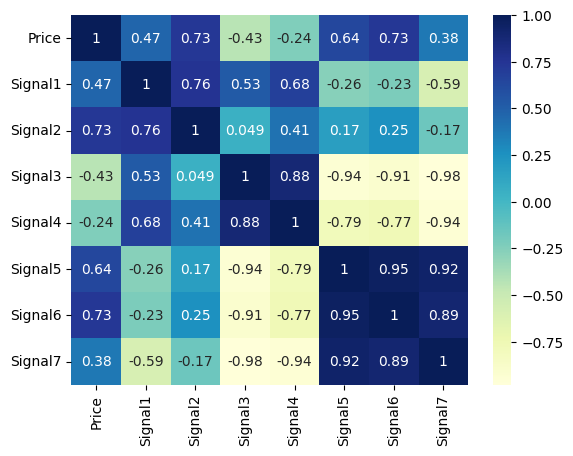

In [30]:
# plotting correlation heatmap
dataplot = sb.heatmap(dfv.corr(), cmap="YlGnBu", annot=True)

# displaying correlation heatmap
plt.show()

In [31]:
# Correlation between price and other signals

# corr=df['Fee'].corr(df['Discount'])
for col in dfv.columns:
  if col == l[0]: continue
  v = dfv['Price'].corr(df[col])
  print(f'Corelation between Price and {col}: {v}')

Corelation between Price and Signal1: 0.471209677110326
Corelation between Price and Signal2: 0.7313182295898938
Corelation between Price and Signal3: -0.4307238138749508
Corelation between Price and Signal4: -0.24325751214107075
Corelation between Price and Signal5: 0.6383122591275368
Corelation between Price and Signal6: 0.7302453752306889
Corelation between Price and Signal7: 0.3798788200008064


> Highest correlation is shown via: Signal 2 and Signal 6 ~ 73%

>Splitting Data into Training and Test Data for the ML Model

In [36]:
from sklearn.model_selection import train_test_split

X=dfv.iloc[:, 1:]
y = dfv['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

print(f'Size of Training values are: {len(X_train), len(y_train) }')
print(f'Size of Training values are: {len(X_test), len(y_test) }')


Size of Training values are: (2250, 2250)
Size of Training values are: (750, 750)


In [38]:
X_train

,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7
487,2325.396,2433.2355,2184.8604,1395.0132,2263.6639,4611.76,8517.0799
1489,1685.788,1715.0841,2299.6121,1374.6455,2030.7911,2898.16,8328.4972
1094,1547.034,1680.4143,2178.6282,1112.6228,2149.7520,3931.76,9190.5655
438,2362.031,2434.4289,2175.0140,1403.2293,2295.7888,4693.36,8611.4248
748,1775.174,2026.8063,2148.4753,1098.6165,2155.1818,4666.16,9070.9008
...,...,...,...,...,...,...,...
763,1852.779,2018.8044,2172.9230,1129.1451,2170.4427,4611.76,9002.8430
835,1862.316,2137.1958,2197.7481,1328.7421,2191.0110,4611.76,8972.7700
1653,1736.941,1587.6810,2334.2190,1393.2758,1988.1789,2626.16,8284.4910
2607,2439.296,2371.4847,2755.7663,2647.1261,1524.7300,803.76,5070.2364


In [42]:
y_train, y_test = pd.DataFrame(y_train), pd.DataFrame(y_test)

In [43]:
# Signals can be used to model assets price via training them on a machine learning model
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
X_train_scaled, x_test_scaled = scale_datasets(X_train, X_test)
y_train_scaled, y_test_scaled = scale_datasets(y_train, y_test)

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train_scaled.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
29/29 [==============================] - 2s 18ms/step - loss: 7.0237 - mean_squared_logarithmic_error: 6.8328 - val_loss: 0.8855 - val_mean_squared_logarithmic_error: 0.9368
Epoch 2/10
29/29 [==============================] - 0s 10ms/step - loss: 0.4355 - mean_squared_logarithmic_error: 0.4238 - val_loss: 0.0508 - val_mean_squared_logarithmic_error: 0.0461
Epoch 3/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0471 - mean_squared_logarithmic_error: 0.0477 - val_loss: 0.0326 - val_mean_squared_logarithmic_error: 0.0291
Epoch 4/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0333 - mean_squared_logarithmic_error: 0.0327 - val_loss: 0.0282 - val_mean_squared_logarithmic_error: 0.0253
Epoch 5/10
29/29 [==============================] - 0s 12ms/step - loss: 0.0311 - mean_squared_logarithmic_error: 0.0308 - val_loss: 0.0250 - val_mean_squared_logarithmic_error: 0.0221
Epoch 6/10
29/29 [==============================] - 0s 10ms/step - loss: 0.

In [54]:
scores = model.evaluate(x_test_scaled, y_test_scaled)
print(scores)

24/24 [==============================] - 0s 4ms/step - loss: 57.0268 - mean_squared_logarithmic_error: 57.0270
[57.026771545410156, 57.0269775390625]


### Model performance in prediction of price from signals via above model

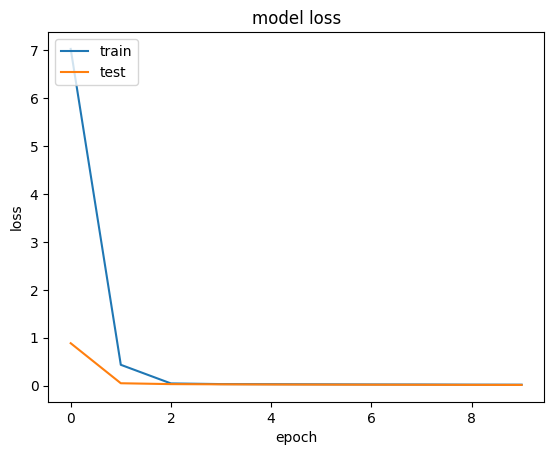

In [48]:
# summarize history forlosses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize